# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np
import datetime

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [3]:
properties.shape

(327, 49)

In [4]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            326 non-null    datetime64[ns]
 1   City of London        327 non-null    object        
 2   Barking & Dagenham    327 non-null    object        
 3   Barnet                327 non-null    object        
 4   Bexley                327 non-null    object        
 5   Brent                 327 non-null    object        
 6   Bromley               327 non-null    object        
 7   Camden                327 non-null    object        
 8   Croydon               327 non-null    object        
 9   Ealing                327 non-null    object        
 10  Enfield               327 non-null    object        
 11  Greenwich             327 non-null    object        
 12  Hackney               327 non-null    object        
 13  Hammersmith & Fulham

From info() we can see that there are some columns that are missing values. Lets summarize those:

In [5]:
# print the cols with missing values
def getShortCols(df):
    rows, cols = df.shape
    for col in df.columns:
        if df[col].isna().any():
            print(col, " is missing ", df[col].isna().sum(), " values")

In [6]:
getShortCols(properties)

Unnamed: 0  is missing  1  values
Unnamed: 34  is missing  327  values
Unnamed: 37  is missing  327  values
Unnamed: 47  is missing  327  values


In [7]:
properties.describe()

,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


I expected stats from the describe(), but only the cols that have numeric types are being used. Looking again at the data, most of columns were imported as object types: 

In [8]:
properties.dtypes

Unnamed: 0              datetime64[ns]
City of London                  object
Barking & Dagenham              object
Barnet                          object
Bexley                          object
Brent                           object
Bromley                         object
Camden                          object
Croydon                         object
Ealing                          object
Enfield                         object
Greenwich                       object
Hackney                         object
Hammersmith & Fulham            object
Haringey                        object
Harrow                          object
Havering                        object
Hillingdon                      object
Hounslow                        object
Islington                       object
Kensington & Chelsea            object
Kingston upon Thames            object
Lambeth                         object
Lewisham                        object
Merton                          object
Newham                   

But they appear to contain numerical data except for the first row:

In [9]:
properties.head(n=1)

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001


We might be able to use this row for keys. Let's see if the non-null values of the first row are unique.

In [10]:
# get series of bools for first row - false when value is null
bool_not_null = properties.iloc[0].notna()
# extract out the non-null values for the row
first_row_vals = properties.loc[0,bool_not_null]
print("there are ", first_row_vals.count(), " non-null values")
# create a set to throw out any redundant codes
unique_codes = np.unique(first_row_vals)
print("there are ", unique_codes.size, " unique values")

there are  45  non-null values
there are  45  unique values


So, there are 49 columns, with 4 columns having one or more null vals. And we have 45 unique codes in row 1 - so that means that there are 4 null values across this row.

Let's check the datetimes too, since they might also to used as keys.

In [11]:
properties['Unnamed: 0'].notna().head()

0    False
1     True
2     True
3     True
4     True
Name: Unnamed: 0, dtype: bool

In [12]:
# get series of bools for first col - false when value is null
bool_not_null = properties['Unnamed: 0'].notna()
# extract out the non-null values for the col
first_col_vals = properties.loc[bool_not_null, 'Unnamed: 0']
print("there are ", first_col_vals.count(), " non-null values")
# create a set to throw out any redundant vals
unique_dates = np.unique(first_col_vals)
print("there are ", unique_dates.size, " unique dates")

there are  326  non-null values
there are  326  unique dates


OK, so dates are unique across rows and can be used as keys. 

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

So far, here is the cleanup info that I've collected:
- there are three columns (Unnamed: 34, Unnamed: 37, Unnamed: 47) that are all nulls. These can be removed.
- there is one column (Unnamed: 34) that contains one null but is otherwise datetime values.
- the first row contains 45 unique non-null values. This suggests that they can be used as col keys. 
- the first column contains 326 unique non-null values (datetime). This suggests that they can be used as row keys.
- if the first row is removed, all the other rows look to have numeric values.

Let's get rid of our empty columns, but use how='all' to drop only fully empty columns. This will preserve column 'Unnamed 0', which contains timestamps except for first row: 

In [13]:
clean_properties = properties.dropna(axis=1, how='all')
clean_properties.shape

(327, 46)

That is the expected shape.

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [14]:
# rename the first column
clean_properties = clean_properties.rename( columns={'Unnamed: 0':'datetime'})
clean_properties.head(n=2)

,datetime,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128


Lets normalize the column headers in terms of case so it's easier to look at:

In [15]:
norm_colname = list(map(lambda x: x.title(), clean_properties.columns))
clean_properties.columns = norm_colname
clean_properties.head(n=1)

,Datetime,City Of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,North East,North West,Yorks & The Humber,East Midlands,West Midlands,East Of England,London,South East,South West,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,E92000001


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [16]:
clean_properties.head()

,Datetime,City Of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,North East,North West,Yorks & The Humber,East Midlands,West Midlands,East Of England,London,South East,South West,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,42095.8436,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,53590.8548


My strategy is to split the source table into a subset of dataframes. The justification here is that workable data should have a column for each variable and a row for each observation. But the data table actually uses redundant variables (a code and a name label - either identifier will do). But there may be some semantic value to maintaining the codes (it looks like they are hierarchical/categorical perhaps). So seperating out a lookup table of code to name seems like a good idea. And the reverse too - name to code.

In referencing the source spreadsheet, certain codes appear in clusters, offset by a blank column. Given that there are 32 boroughs, I've inferred semantic meanings for the clusters that I want to save to seperate dataframes:
- E09000001: City of London
- E09000002-E09000033: Boroughs of London
- E13000001-E13000002: Inner and Outer London
- E12000001-E12000009: Regions of London
- E92000001: The country of England

If I need to get info from multiple tables, I can just do joins to get the view that I need.

Define the region code params that will be used for each of the region subset dataframes defined above:

In [17]:
city_of_london_codes=['E09000001']
boroughs_of_london_codes=['E09000002','E09000003','E09000004','E09000005','E09000006','E09000007','E09000008','E09000009','E09000010','E09000011','E09000012','E09000013','E09000014','E09000015','E09000016','E09000017','E09000018','E09000019','E09000020','E09000021','E09000022','E09000023','E09000024','E09000025','E09000026','E09000027','E09000028','E09000029','E09000030','E09000031','E09000032','E09000033']
inner_outer_london_codes=['E13000001','E13000002']
regions_of_london_codes=['E12000001','E12000002','E12000003','E12000004','E12000005','E12000006','E12000007','E12000008','E12000009']
country_of_england_codes=['E92000001']

assert len(city_of_london_codes) == 1
assert len(boroughs_of_london_codes) == 32
assert len(inner_outer_london_codes) == 2
assert len(regions_of_london_codes) == 9
assert len(country_of_england_codes) == 1


In [18]:
clean_properties.melt(id_vars='Datetime').head()
#print(clean_properties.columns)

,Datetime,variable,value
0,NaT,City Of London,E09000001
1,1995-01-01,City Of London,91448.98487
2,1995-02-01,City Of London,82202.77314
3,1995-03-01,City Of London,79120.70256
4,1995-04-01,City Of London,77101.20804


Let's start with the lookup tables:

In [19]:
code2name = clean_properties.loc[0].drop("Datetime",axis=0).reset_index()
code2name.rename(columns={"index": "region_name", 0: "code"}, inplace = True)
code2name.set_index('code', inplace = True)
assert code2name.shape == (45,1)
code2name.head()

,region_name
code,
E09000001,City Of London
E09000002,Barking & Dagenham
E09000003,Barnet
E09000004,Bexley
E09000005,Brent


In [20]:
name2code = clean_properties.loc[0].drop("Datetime",axis=0).reset_index()
name2code.rename(columns={"index": "region_name", 0: "code"}, inplace = True)
name2code.set_index('region_name', inplace = True)
assert name2code.shape == (45,1)
name2code.head()

,code
region_name,
City Of London,E09000001
Barking & Dagenham,E09000002
Barnet,E09000003
Bexley,E09000004
Brent,E09000005


In [21]:
name2code.loc['City Of London']

code    E09000001
Name: City Of London, dtype: object

In [22]:
clean_properties.head()

,Datetime,City Of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,North East,North West,Yorks & The Humber,East Midlands,West Midlands,East Of England,London,South East,South West,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,42095.8436,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,53590.8548


That's one table down. Let's create the data tables for each region now. I think that the cleanest way might be to start from a melt and then extract regions based on their codes. Since I already have the code to name lookup table, I can safely ignore names:

In [23]:
melted = clean_properties.melt(id_vars='Datetime').dropna()
melted.head()

,Datetime,variable,value
1,1995-01-01,City Of London,91448.98487
2,1995-02-01,City Of London,82202.77314
3,1995-03-01,City Of London,79120.70256
4,1995-04-01,City Of London,77101.20804
5,1995-05-01,City Of London,84409.14932


In [24]:
# takes a list of region codes and returns a new dataframe that is subset for those codes
def extractByCode(codes=[]):
    region_names=code2name.loc[codes]
    regions = melted[melted.loc[:,'variable'].isin(region_names.region_name)]
    regions = regions.set_index('Datetime', drop=True)
    regions.rename(columns={'variable':'region'}, inplace = True)
    return regions

city_of_london_df = extractByCode(city_of_london_codes)
boroughs_of_london_df = extractByCode(boroughs_of_london_codes)
inner_outer_london_df = extractByCode(inner_outer_london_codes)
regions_of_london_df = extractByCode(regions_of_london_codes)
country_of_england_df = extractByCode(country_of_england_codes)

In [25]:
boroughs_of_london_df.sample(5)

,region,value
Datetime,,
2011-01-01,Haringey,316021.1522
2017-12-01,Lewisham,408684.3189
2011-10-01,Newham,212406.2436
2005-04-01,Waltham Forest,194378.9006
2014-09-01,Bexley,258619.3287


__You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You also might find you need to assign the values of the first row to your column headings . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).__

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [26]:
boroughs_of_london_df.dtypes.head()

region    object
value     object
dtype: object

In [27]:
boroughs_of_london_df = boroughs_of_london_df.convert_dtypes(infer_objects=True, \
                        convert_string=True, convert_integer=True, \
                        convert_boolean=True, convert_floating=True)

In [28]:
boroughs_of_london_df.dtypes.head()

region     string
value     Float64
dtype: object

That's more like it. Now for the rest of the datasets:

In [29]:
city_of_london_df = city_of_london_df.convert_dtypes(infer_objects=True, \
                        convert_string=True, convert_integer=True, \
                        convert_boolean=True, convert_floating=True)

In [30]:
city_of_london_df.dtypes.head()

region     string
value     Float64
dtype: object

In [31]:
inner_outer_london_df = inner_outer_london_df.convert_dtypes(infer_objects=True, \
                        convert_string=True, convert_integer=True, \
                        convert_boolean=True, convert_floating=True)

In [32]:
inner_outer_london_df.dtypes.head()

region     string
value     Float64
dtype: object

In [33]:
regions_of_london_df = regions_of_london_df.convert_dtypes(infer_objects=True, \
                        convert_string=True, convert_integer=True, \
                        convert_boolean=True, convert_floating=True)

In [34]:
regions_of_london_df.dtypes.head()

region     string
value     Float64
dtype: object

In [35]:
country_of_england_df = country_of_england_df.convert_dtypes(infer_objects=True, \
                        convert_string=True, convert_integer=True, \
                        convert_boolean=True, convert_floating=True)

In [36]:
country_of_england_df.dtypes.head()

region     string
value     Float64
dtype: object

And the lookup tables for good measure:

In [37]:
name2code = name2code.convert_dtypes(infer_objects=True, convert_string=True, convert_integer=True, \
                                 convert_boolean=True, convert_floating=True)

In [38]:
name2code.dtypes.head()

code    string
dtype: object

In [39]:
code2name = code2name.convert_dtypes(infer_objects=True, convert_string=True, convert_integer=True, \
                                 convert_boolean=True, convert_floating=True)

In [40]:
code2name.dtypes.head()

region_name    string
dtype: object

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [41]:
boroughs_of_london_df.sample(5)

,region,value
Datetime,,
2008-08-01,Hammersmith & Fulham,487355.2595
2019-06-01,Hammersmith & Fulham,713137.331
2010-09-01,Tower Hamlets,282086.9226
2013-11-01,Haringey,398220.8419
2017-08-01,Hounslow,402392.6427


In [42]:
# reshape s.t. region name is column header
bol_pivot = boroughs_of_london_df.reset_index().pivot(index="Datetime", columns='region', values='value')
bol_pivot.head()

region,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond Upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Datetime,,,,,,,,,,,,,,,,,,,,,
1995-01-01,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,72514.69096,62300.10169,...,82070.6133,53539.31919,72189.58437,109326.1245,67885.20344,71536.97357,59865.18995,61319.44913,88559.04381,133025.2772
1995-02-01,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,73155.19746,60993.26863,...,79982.74872,53153.88306,72141.6261,111103.0394,64799.0648,70893.20851,62318.53353,60252.12246,88641.01678,131468.3096
1995-03-01,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,72190.44144,61377.83464,...,80661.68279,53458.26393,72501.35502,107325.4742,65763.29719,70306.83844,63938.67686,60871.08493,87124.81523,132260.3417
1995-04-01,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,71442.92235,61927.7246,...,79990.54333,54479.75395,72228.60295,106875.0,63073.62117,69411.9439,66233.19383,60971.39722,87026.00225,133370.2036
1995-05-01,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,70630.77955,63512.99103,...,80873.98643,55803.95958,72366.64122,107707.6799,64420.49933,69759.21989,66432.85846,61494.16938,86518.05945,133911.1117


In [43]:
camden = bol_pivot.iloc[:,5]
camden

Datetime
1995-01-01    120932.8881
1995-02-01    119508.8622
1995-03-01    120282.2131
1995-04-01     120097.899
1995-05-01    119929.2782
                 ...     
2021-10-01    847912.6731
2021-11-01    875827.4166
2021-12-01    898598.5066
2022-01-01    866923.1278
2022-02-01     870731.643
Name: Camden, Length: 326, dtype: Float64

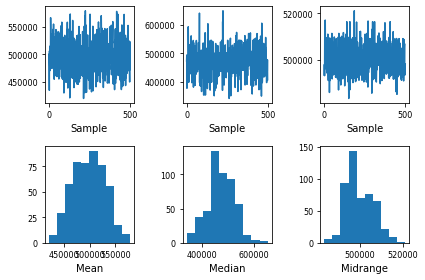

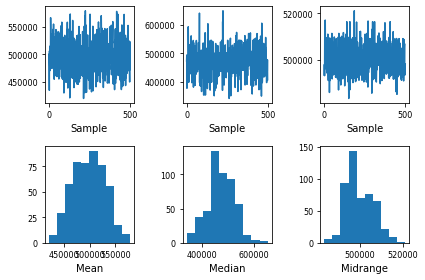

In [44]:
pd.plotting.bootstrap_plot(camden)

Month vs average price in Camden borough:

<AxesSubplot:xlabel='Datetime'>

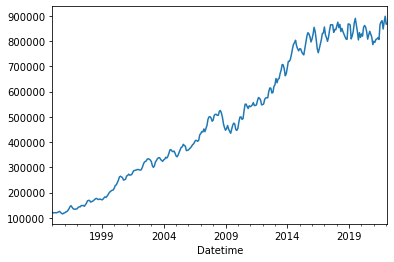

In [45]:
camden.plot()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [46]:
#
## reduce dimensionality by using year to aggregate values
#
# first, downsample data into one year bins and take the new value as the average of months of current year
bol_pivot_yearly = bol_pivot.resample("1Y").mean()
# rename index
bol_pivot_yearly.index.names = ['year']
bol_pivot_yearly = bol_pivot_yearly.reset_index()
# date now has format yyyy-mm-dd, but we only want year part
years = bol_pivot_yearly['year'].dt.year
bol_pivot_yearly['year'] = years
# set year as index
bol_pivot_yearly= bol_pivot_yearly.set_index('year')

bol_pivot_yearly


region,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond Upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
1995,51817.96939,91792.537433,64291.532845,73029.84184,81967.316732,120367.431783,68923.340845,81218.674792,71984.234888,63389.786578,...,80500.752648,54574.226405,72580.490579,109892.274008,64260.053745,70291.304638,63652.44601,61279.980463,88829.083075,133689.233033
1996,51718.19269,94000.445448,65490.417234,75235.918367,83547.483633,133810.487933,69713.920086,83389.914491,74062.012957,65186.78177,...,83999.034578,55747.012583,75358.658939,117307.882658,70117.306851,71651.92003,70094.724437,62177.237897,92270.037989,139188.760342
1997,55974.262309,106883.185546,70789.406602,86749.070663,94224.688035,150142.901208,77674.269967,97805.824543,83609.439219,72067.770377,...,95699.209073,60971.380317,83371.972795,136656.271017,79725.85014,81094.119743,85759.562757,68228.785835,108108.356495,165447.591208
1998,60285.821083,122359.468033,80632.020822,100692.590417,108286.520467,170688.973933,88143.22883,111343.15465,93030.224322,81532.933366,...,108049.855117,67671.270763,94514.395822,162956.066025,91405.187779,92087.045921,96505.166407,75557.474132,125406.807233,190531.949942
1999,65320.934441,136004.512067,86777.715903,112157.469808,120874.179567,191090.697392,97173.322854,126278.342342,101986.993642,90879.131712,...,121901.372575,74525.568363,102940.450633,181772.319642,110267.545583,100869.813722,113035.289367,83821.587936,145339.809767,214042.702508
2000,77549.51329,167952.633958,103186.665184,140962.500458,147826.713417,247114.633575,118777.304475,153309.280133,121839.206633,110162.975158,...,151605.431075,92887.329294,124379.142075,227866.164158,142266.729008,125952.0475,141287.778167,103030.676566,184275.835267,260492.249892
2001,88664.058223,185563.3526,116527.13475,157287.404625,162131.842133,278594.043717,132509.212908,170190.618025,135713.171425,125820.069908,...,167046.236783,108763.058008,141587.528275,241333.288742,164486.246675,137910.189683,162505.936058,118843.459333,205179.661233,296105.498142
2002,112221.912482,220746.059225,136797.964475,185898.147992,186646.043217,314179.507833,157022.768092,198426.774842,159791.067967,147421.507267,...,195714.692417,137455.635925,169368.107767,271689.372425,184684.204442,162526.655508,187288.508558,148137.483958,232805.560442,339622.391283
2003,142498.9278,251212.927683,164482.038908,216501.757008,215992.974433,323053.850375,185784.025417,221689.173708,190572.739383,171042.618658,...,220394.19315,168437.517258,203571.971092,294167.994608,199583.838183,187815.760933,207901.578408,175075.867192,253342.476767,363466.029992


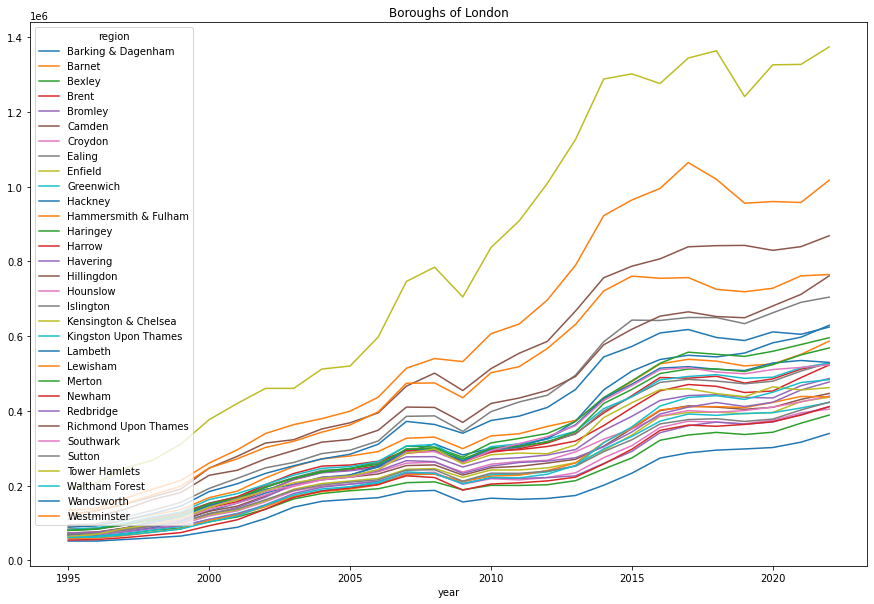

In [47]:
ax = bol_pivot_yearly.plot(figsize=(15, 10), title="Boroughs of London")

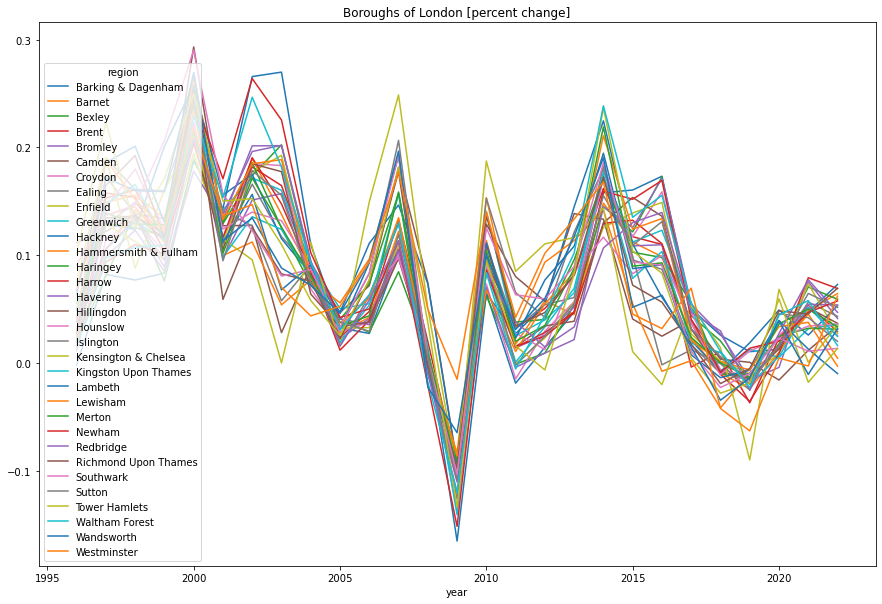

In [48]:
# yearly percent change for boroughs
cum_bol_pivot_yearly = bol_pivot_yearly.pct_change()
ax = cum_bol_pivot_yearly.plot(figsize=(15, 10), title="Boroughs of London [percent change]")

Let's do the same reshaping and plotting for the other data frames that are built, but do it via a function this time for conciseness.

In [49]:
# reshape given data frame for plotting - returns a copy
def reshapeForPlotting(df):
    df = df.reset_index().pivot(index="Datetime", columns='region', values='value')
    # first, downsample data into one year bins and take the new value as the average of months of current year
    df = df.resample("1Y").mean()
    # rename index
    df.index.names = ['year']
    df = df.reset_index()
    # date now has format yyyy-mm-dd, but we only want year part
    years = df['year'].dt.year
    df['year'] = years
    # set year as index
    return df.set_index('year')

<AxesSubplot:title={'center':'City of London'}, xlabel='year'>

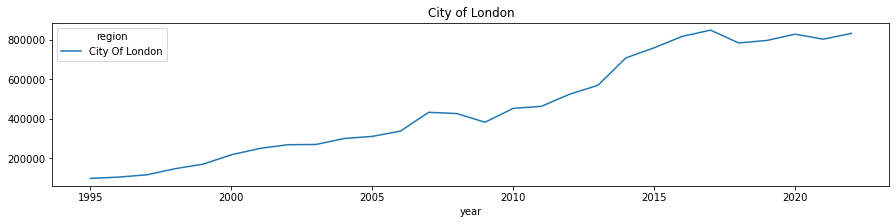

In [50]:
# plot city of London as a whole
plot_city_of_london_df = reshapeForPlotting(city_of_london_df)
plot_city_of_london_df.plot(figsize=(15, 3), title='City of London')

<AxesSubplot:title={'center':'Inside and Outside London'}, xlabel='year'>

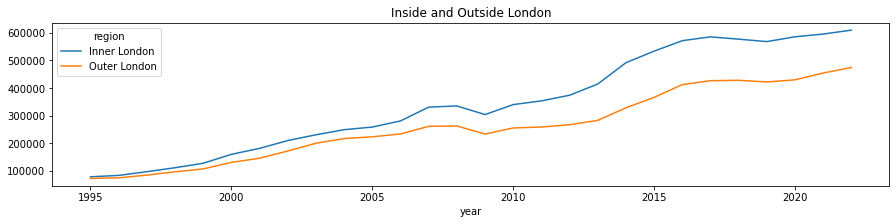

In [51]:
# plot inner and outer London values
plot_inner_outer_london_df = reshapeForPlotting(inner_outer_london_df)
plot_inner_outer_london_df.plot(figsize=(15, 3), title='Inside and Outside London')

<AxesSubplot:title={'center':'Regions of England'}, xlabel='year'>

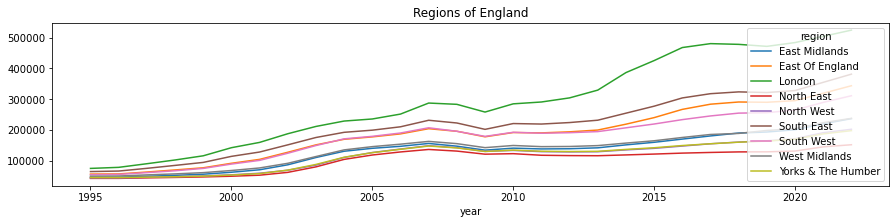

In [52]:
# plot regions of England values
plot_regions_of_london_df = reshapeForPlotting(regions_of_london_df)
plot_regions_of_london_df.plot(figsize=(15, 3), title='Regions of England')

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

#### Investigate which boroughs of London have seen the greatest house price increase, on average, over the past two decades?

In [53]:
def create_price_ratio(borough):
    temp = bol_pivot_yearly[borough].reset_index()
    # get average price between 1998-2018
    avg_price_1998 = temp[temp.year == 1998][borough].values[0]
    avg_price_2018 = temp[temp.year == 2018][borough].values[0]
    # calculate ratio for 1998 divided by the Average Price for 2018
    ratio_2018_1998 = round((avg_price_1998 / avg_price_2018),3)
    return ratio_2018_1998

# sanity check function (1998=92087.045921, 2018=379262.580582, ratio=~0.243)
assert create_price_ratio('Sutton') == 0.243

In [54]:
# gather the ratios for each borough
borough_avg_price_ratios_1998_2018 = {}

for b in bol_pivot_yearly.columns:
    ratio = create_price_ratio(b)
    borough_avg_price_ratios_1998_2018[b]=ratio
    
print(borough_avg_price_ratios_1998_2018)

{'Barking & Dagenham': 0.204, 'Barnet': 0.229, 'Bexley': 0.235, 'Brent': 0.204, 'Bromley': 0.244, 'Camden': 0.203, 'Croydon': 0.238, 'Ealing': 0.232, 'Enfield': 0.235, 'Greenwich': 0.21, 'Hackney': 0.161, 'Hammersmith & Fulham': 0.242, 'Haringey': 0.195, 'Harrow': 0.246, 'Havering': 0.231, 'Hillingdon': 0.238, 'Hounslow': 0.251, 'Islington': 0.206, 'Kensington & Chelsea': 0.197, 'Kingston Upon Thames': 0.234, 'Lambeth': 0.202, 'Lewisham': 0.184, 'Merton': 0.211, 'Newham': 0.188, 'Redbridge': 0.224, 'Richmond Upon Thames': 0.25, 'Southwark': 0.181, 'Sutton': 0.243, 'Tower Hamlets': 0.216, 'Waltham Forest': 0.171, 'Wandsworth': 0.21, 'Westminster': 0.187}


In [55]:
# create a new dataframe from the dictionary of ratios
ratios = pd.DataFrame(list(borough_avg_price_ratios_1998_2018.items()))
ratios.columns = ['region','ratio']
sorted_ratios = ratios.sort_values(by='ratio')

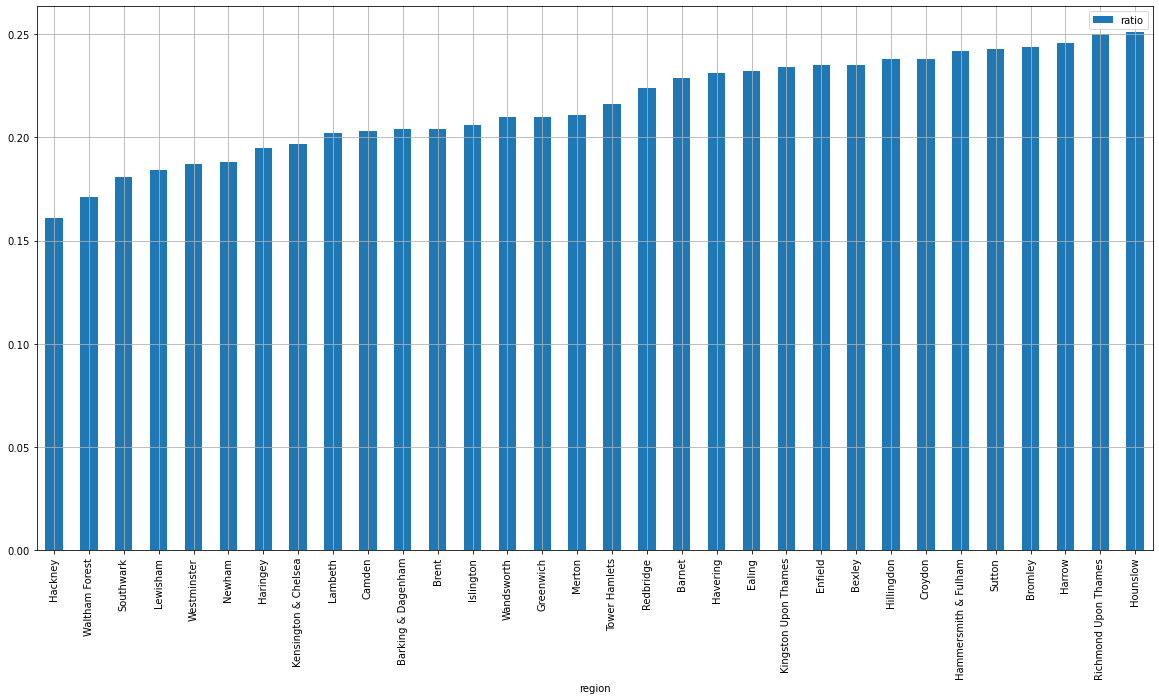

In [56]:
ax = sorted_ratios.plot.bar(x='region', y='ratio', rot=90, figsize=(20, 10), grid=True)

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

From the bar chart above (sorted in ascending order of average price difference between 1998 and 2018), the greatest change was seen in the Hounslow borough, followed by Richmond Upon Thames and Harrow.
This represents an end-over-end change based on yearly averages per borough. A more detailed analysis might look into fluctuations that occur between the chosen endpoints of 1998 and 2018. However, in referencing both the chart entitled  "Boroughs of London" and also "Boroughs of London [percent change]", its pretty clear that average housing prices trend together. This suggests that taking the difference between two distant enpoints in time captures the overall movement of prices.